
0: 480x640 1 burst, 1365.6ms
Speed: 5.1ms preprocess, 1365.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)
Detection: burst
Length of the bounding box: 251.64 cm
--------------------


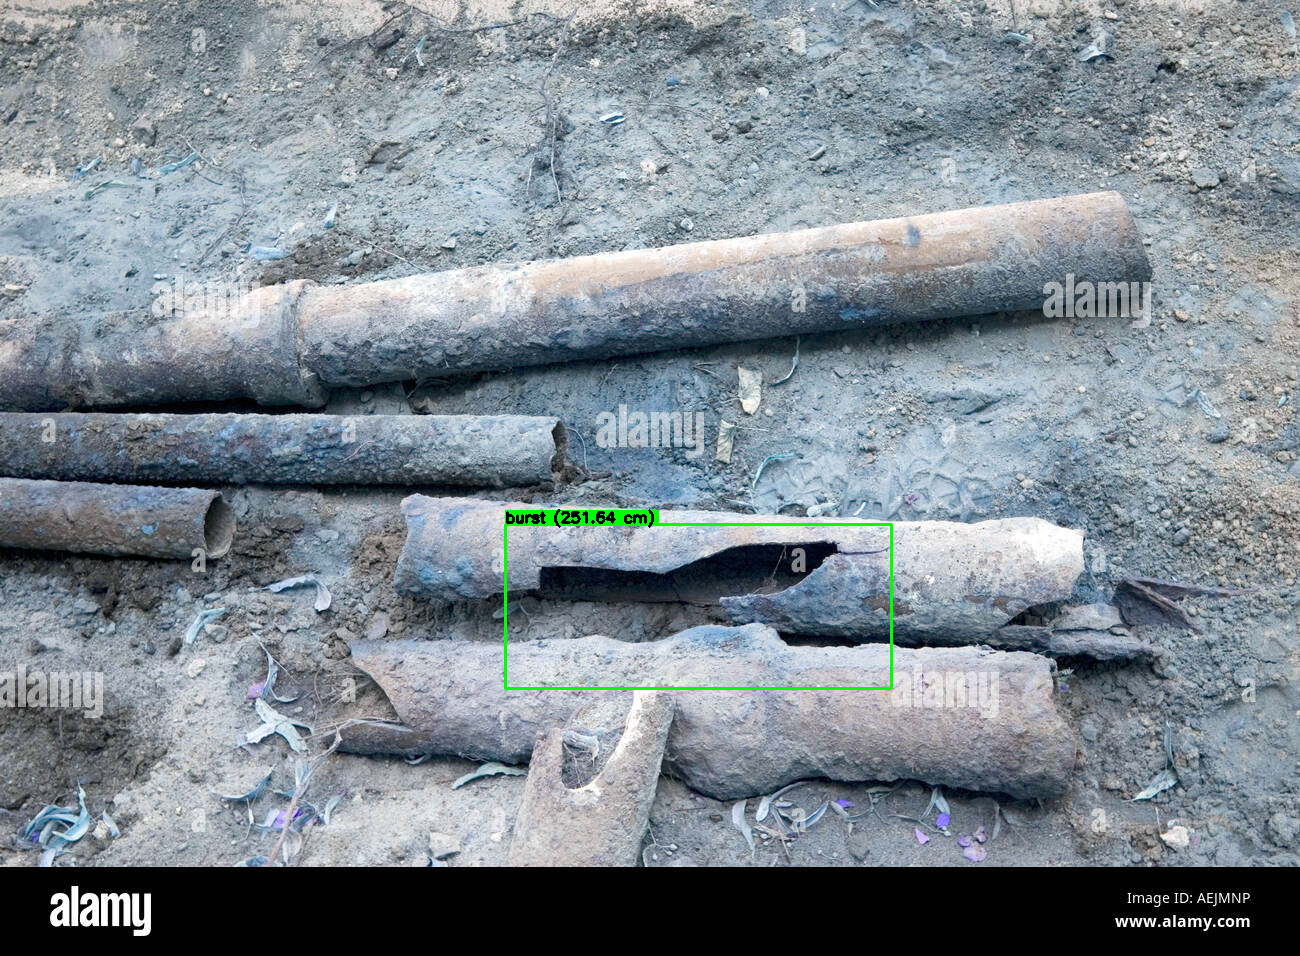

In [9]:
# Install required libraries
!pip install ultralytics

# Import necessary libraries
import torch
import math
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np

# Mount Google Drive (if needed)
# from google.colab import drive
# drive.mount('/content/drive')

# Upload input image and model file to Colab


# Load the trained YOLOv8 model
model = YOLO('pipe defect.pt')

# Load the input image
input_image = Image.open('pipe.jpeg')

# Run the model inference
results = model(input_image)

# Extract the bounding box coordinates and detection classes
bounding_boxes = results[0].boxes.xyxy.cpu().numpy()
detection_classes = results[0].boxes.cls.cpu().numpy()

# Assuming you have the pixel-to-cm conversion factor
pixel_to_cm_factor = 0.6  # Example value, replace with your actual conversion factor

# Convert the input image to a NumPy array
np_image = np.array(input_image)

# Print the detection output and display the image with bounding boxes and lengths
for box, cls in zip(bounding_boxes, detection_classes):
    # Unpack the bounding box coordinates
    x1, y1, x2, y2 = box.astype(int)

    # Calculate the width and height of the bounding box
    width_pixels = x2 - x1
    height_pixels = y2 - y1

    # Convert pixel dimensions to centimeters
    width_cm = width_pixels * pixel_to_cm_factor
    height_cm = height_pixels * pixel_to_cm_factor

    # Calculate the length of the bounding box in centimeters
    length_cm = math.sqrt(width_cm**2 + height_cm**2)

    # Get the detection class name
    class_name = model.names[int(cls)]

    # Draw the bounding box on the image
    cv2.rectangle(np_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Add text with the detection class name and length
    text = f"{class_name} ({length_cm:.2f} cm)"
    (text_width, text_height), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
    box_coords = ((x1, y1), (x1 + text_width + 2, y1 - text_height - 2))
    cv2.rectangle(np_image, box_coords[0], box_coords[1], (0, 255, 0), cv2.FILLED)
    cv2.putText(np_image, text, (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    print(f"Detection: {class_name}")
    print(f"Length of the bounding box: {length_cm:.2f} cm")
    print("-" * 20)

# Display the image with bounding boxes and lengths
from google.colab.patches import cv2_imshow
cv2_imshow(np_image)